<a href="https://colab.research.google.com/github/Mohamed9501/Artificial-Intelligence/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation
from keras.models import Sequential
from keras.losses import sparse_categorical_crossentropy
from keras import datasets

In [45]:
# Load Data
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
# Data Padding to have a shape of 32x32 instead of 28x28
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])
# Normalization
x_train = x_train / 255
x_test = x_test / 255
# Check Shape
print(x_train.shape)
print(x_test.shape)

(60000, 32, 32)
(10000, 32, 32)


In [46]:
# Add an extra channel dimension for the convolution input
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [47]:
# Take 2000 images out of 60000 to be validation images.
x_train = x_train[0:x_train.shape[0]-2000,:,:,:] 
y_train = y_train[0:x_train.shape[0]-2000]
x_val = x_train[x_train.shape[0]-2000:x_train.shape[0],:,:,:] 
y_val = y_train[x_train.shape[0]-2000:x_train.shape[0]:] 

In [48]:
model = Sequential()
model.add(Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=x_train.shape[1:]))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh'))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120, kernel_size=5, strides=1, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_6 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_7 (Activation)   (None, 5, 5, 16)         

In [17]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 4s 4ms/step - loss: 1.5416 - accuracy: 0.4344 - val_loss: 0.3781 - val_accuracy: 0.8930
Epoch 2/40
907/907 [==============================] - 3s 4ms/step - loss: 0.3740 - accuracy: 0.8826 - val_loss: 0.1963 - val_accuracy: 0.9450
Epoch 3/40
907/907 [==============================] - 3s 4ms/step - loss: 0.2893 - accuracy: 0.9084 - val_loss: 0.1625 - val_accuracy: 0.9565
Epoch 4/40
907/907 [==============================] - 3s 4ms/step - loss: 0.2421 - accuracy: 0.9226 - val_loss: 0.1467 - val_accuracy: 0.9605
Epoch 5/40
907/907 [==============================] - 3s 4ms/step - loss: 0.2153 - accuracy: 0.9309 - val_loss: 0.1652 - val_accuracy: 0.9575
Epoch 6/40
907/907 [==============================] - 3s 4ms/step - loss: 0.1949 - accuracy: 0.9383 - val_loss: 0.1106 - val_accuracy: 0.9725
Epoch 7/40
907/907 [==============================] - 3s 4ms/step - loss: 0.1773 - accuracy: 0.9438 - val_loss: 0.1014 - val_accuracy: 0.9725
Epoch 

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9729


[0.09423103928565979, 0.9728999733924866]

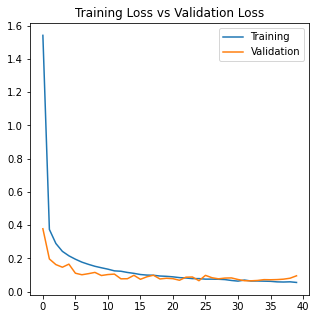

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.legend(['Training', 'Validation'])


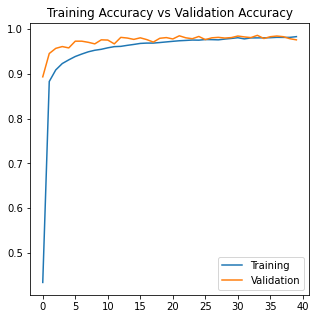

In [57]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.plot(history.history['accuracy'])
axs.plot(history.history['val_accuracy']) 
axs.title.set_text('Training Accuracy vs Validation Accuracy')
axs.legend(['Training', 'Validation'])


References:
https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342